In this notebook, we use Sympy for evaluating the boundary condition. We also print the result in LaTeX.

In [1]:
import numpy as np
import sympy as sp

In [2]:
sp.init_printing(use_latex=True)

Declaring the variables and function:

In [3]:
x,nu,t = sp.symbols('x nu t')
phi = (sp.exp(-(x-4*t)**2)/(4*nu*(t+1))) + sp.exp((-(x-4*t-2*sp.pi)**2)/(4*nu))

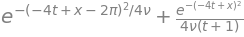

In [4]:
phi

In [5]:
phi = sp.exp((-1*(x-4*t)**2)/(4*nu*(t+1))) + sp.exp((-1*(x-4*t-2*sp.pi)**2)/(4*nu*(t+1)))
phi

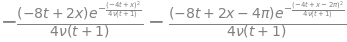

In [6]:
phiprime = phi.diff(x)
phiprime

In [7]:
from sympy.utilities.lambdify import lambdify

In [8]:
u = ((-2*nu/phi)*phiprime) + 4
print(u)

-2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 4*pi)*exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4


Here, we use the 'lambdify' option to evaluate the function value for user-selected values of the parameter and variables.

In [9]:
ufunc = lambdify((t,x,nu),u)
print(ufunc(1,4,3))

3.49170664206445


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

Declaring the values of parameters and printing out the results of the boundary condition as an array.

In [11]:
#Variable declarations
nx = 101
nt = 100
dx = 2*np.pi/(nx-1)
nu = 0.07
dt = dx*nu

x = np.linspace(0,2*np.pi,nx)
un = np.empty(nx)
t = 0

u = np.asarray([ufunc(t,x0,nu) for x0 in x])
u

array([4.        , 4.06283185, 4.12566371, 4.18849556, 4.25132741,
       4.31415927, 4.37699112, 4.43982297, 4.50265482, 4.56548668,
       4.62831853, 4.69115038, 4.75398224, 4.81681409, 4.87964594,
       4.9424778 , 5.00530965, 5.0681415 , 5.13097336, 5.19380521,
       5.25663706, 5.31946891, 5.38230077, 5.44513262, 5.50796447,
       5.57079633, 5.63362818, 5.69646003, 5.75929189, 5.82212374,
       5.88495559, 5.94778745, 6.0106193 , 6.07345115, 6.136283  ,
       6.19911486, 6.26194671, 6.32477856, 6.38761042, 6.45044227,
       6.51327412, 6.57610598, 6.63893783, 6.70176967, 6.76460125,
       6.82742866, 6.89018589, 6.95176632, 6.99367964, 6.72527549,
       4.        , 1.27472451, 1.00632036, 1.04823368, 1.10981411,
       1.17257134, 1.23539875, 1.29823033, 1.36106217, 1.42389402,
       1.48672588, 1.54955773, 1.61238958, 1.67522144, 1.73805329,
       1.80088514, 1.863717  , 1.92654885, 1.9893807 , 2.05221255,
       2.11504441, 2.17787626, 2.24070811, 2.30353997, 2.36637

Plotting the results of the computation:

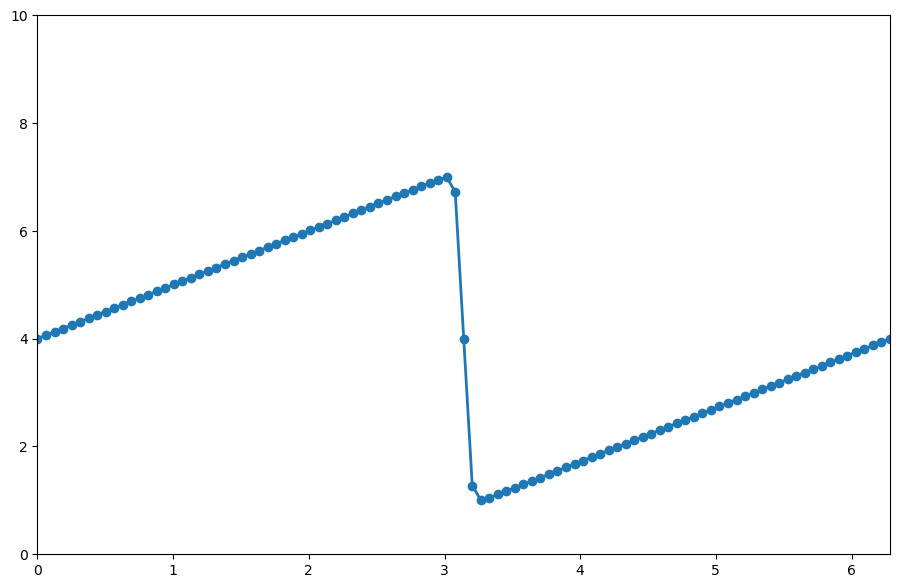

In [12]:
plt.figure(figsize=(11,7), dpi=100)
plt.plot(x,u,marker='o',lw=2)
plt.xlim([0,2*np.pi])
plt.ylim([0,10])

Writing a loop for numerically computing the value of $u$:

In [13]:
for n in range(nt):
    un = u.copy()
    for i in range(1,nx-1):
        u[i] = un[i] - un[i]*(dt/dx)*(un[i]-un[i-1]) + (nu*dt/(dx**2))*(un[i+1]+un[i-1]-2*un[i])
    u[0] = un[0] - un[0]*(dt/dx)*(un[0]-un[-2]) + (nu*dt/(dx**2))*(un[1] - 2*un[0] + un[-2])
    u[-1] = u[0]
    
u_analytical = np.asarray([ufunc(nt*dt,xi,nu) for xi in x])

Plotting the curves - both the analytical as well as the numerical solutions are plotted to compare the two:

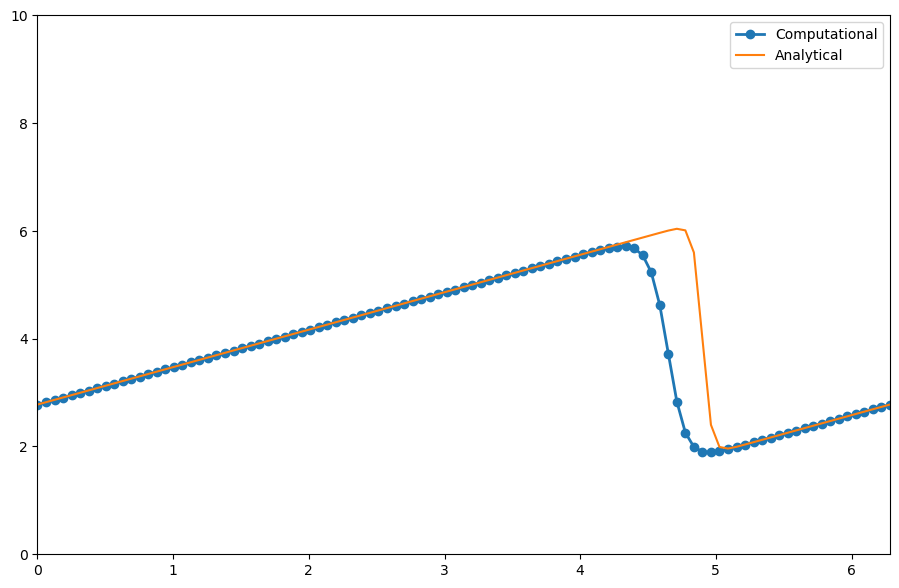

In [14]:
plt.figure(figsize=(11,7),dpi=100)
plt.plot(x,u,marker='o',lw=2,label='Computational')
plt.plot(x,u_analytical,label='Analytical')
plt.xlim([0,2*np.pi])
plt.ylim([0,10])
plt.legend()